In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Considere o planejamento de um experimento para medir a posição (𝐿, em 𝑐𝑚) de um objeto em função do tempo (𝑡, em 𝑠) se movendo ao longo de uma canaleta horizontal com velocidade supostamente constante. Serão coletados dados da posição do corpo, com incerteza 𝜎𝐿 = 0,5 𝑐𝑚, a cada 1 𝑠 entre o início da contagem de tempo até 10 𝑠 (ou seja, que {𝑡𝑖 } = {0, 1, 2, . . . , 10} 𝑠). 

De acordo com o modelo proposto, a equação de ajuste desses dados para 𝑦 = 𝐿 e 𝑥 = 𝑡 pode ser escrita como 𝑦𝑖 = 𝛼 + 𝛽. 𝑥𝑖 (onde 𝛼 é a posição inicial e 𝛽 a velocidade do corpo) e, portanto, 𝑔1(𝑖) = 1 e 𝑔2(𝑖) = 𝑥𝑖.

a) Calcule a matriz de covariância dos parâmetros ajustados, 𝑉𝐴̃, lembrando que a matriz 𝑀 referente ao ajuste deste experimento só depende das funções 𝑔𝑘(𝑖) e das incertezas dos dados, 𝜎𝑖 (e, portanto, 𝑉𝐴̃ = 𝑀−1 não depende dos valores a serem medidos no experimento). Use 𝑉𝐴̃ para determinar a incerteza dos parâmetros a serem ajustados, 𝛼̃ e 𝛽̃, bem como o coeficiente de correlação entre eles, 𝜌(𝛼̃, 𝛽̃). Escreva o coeficiente de correlação com 3 casas decimais.

Calculo a inversa de:
M = 

| $\sum_{i=0}^{10} 1/\sigma i^2$   | $\sum_{i=0}^{10} x_i/\sigma_i^2$   |
|----------------------------------|------------------------------------|
| $\sum_{i=0}^{10} x_i/\sigma_i^2$ | $\sum_{i=0}^{10} x_i^2/\sigma_i^2$ |

In [2]:
σ = .5
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
a11 = np.sum([(1/σ)**2]*len(x))
a12 = np.sum(x/(σ)**2)
a21 = np.sum(x/(σ)**2)
a22 = np.sum(x**2/(σ)**2)
m = np.array([a11, a12, a21, a22]).reshape(2,2)
minv = np.linalg.inv(m)
print('matrix de covariância:\n', minv)
print(f'ρ= {np.round(minv[1,0]/sqrt(minv[0,0]*minv[1,1]), decimals=3)}')

matrix de covariância:
 [[ 0.07954545 -0.01136364]
 [-0.01136364  0.00227273]]
ρ= -0.845


b) Suponha que o valor verdadeiro da posição inicial e da velocidade sejam 𝛼0 = 20 𝑐𝑚 e 𝛽0 = 3 𝑐𝑚/𝑠 . Considere ainda que os dados tenham erros gaussianos e gere um possível conjunto de dados, {𝑦𝑖 }, que poderia ser obtido no experimento e calcule os valores dos parâmetros 𝛼̃ e 𝛽̃ obtido no ajuste desses dados e calcule o 𝜒 2 e o número de graus de liberdade do ajuste.


In [3]:
def modelo(α, β, σ, x):
    y = np.zeros(len(x))
    for i in range(len(y)):
        y[i] = x[i]*β + α + σ*np.random.randn()
    return y

In [4]:
a = 20
b = 3
s = 0.5
dataset = modelo(a, b, s, x)

Temos que $D = M A$, logo $M^{-1}$ $D = A$. A matriz $M^{-1}$ já foi obtida, vamos calcular $D$ com os resultados do dataset.

In [5]:
d1 = np.sum(dataset/(s**2))
d2 = np.sum(np.multiply(dataset, x)/(s**2))
D = np.array([d1, d2])

Agora, basta fazer o produto $M^{-1}D$ para obter $A$.

In [6]:
A = np.matmul(minv, D)
σA = np.array([np.sqrt(minv[0,0]), np.sqrt(minv[1,1])])
C2 = np.sum( ((dataset-(A[1]*x + A[0]))/s)**2 )
NGL = len(x) - len(D)
print(f'X^2 = {np.round(C2, decimals=3)}')
print(f'NGL = {NGL}')
print(f'O valor de a = {np.round(A[0], decimals=3)} +- {np.round(σA[0], decimals=3)} e b = {np.round(A[1], decimals=3)} +- {np.round(σA[1], decimals=3)}')
#CONFERIR A INCERTEZA (ASSISTIR AULA)

X^2 = 3.911
NGL = 9
O valor de a = 20.389 +- 0.282 e b = 2.987 +- 0.048


c) Gere 𝑁𝑅𝐸𝑃 = 10.000 conjuntos de dados, {𝑦𝑖 } nas mesmas condições consideradas no item b e, para cada conjunto, determine os parâmetros 𝛼̃ e 𝛽̃ e calcule o 𝜒2 do ajuste correspondente.


In [7]:
def mult(α, β, σ, x, N):
    y = np.zeros((N, len(x)))
    for i in range(len(y)):
        y[i] = modelo(a, b, s, x)
    return y

In [8]:
N = 10000
y = mult(a, b, s, x, N)

c.1) Faça o histograma com os 𝑁𝑅𝐸𝑃 valores obtidos para 𝛼̃ e calcule o desvio-padrão amostral desses valores. Compare esse desvio-padrão com a incerteza prevista para o parâmetro 𝛼 calculada noitem a. Obs: Se necessário, estime a incerteza do desvio-padrão amostral por 𝑖𝑛𝑐𝑠 ≅𝑠√2(𝑁−1).

Desvio padrão de a = (0.279 +- 0.002) cm


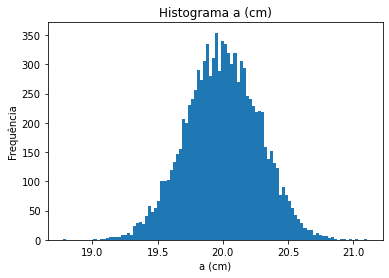

In [9]:
e1 = np.array([np.sum(i/(s**2)) for i in y])
e2 = np.array([np.sum(np.multiply(i, x)/(s**2) ) for i in y])
e = np.array([e1,e2])

B = np.zeros((N,2))
for i in range(len(B)):
    B[i] = np.matmul(minv, e[:,i])
print(f'Desvio padrão de a = ({np.round(np.std(B[:,0], ddof=1), decimals=3)} +- {np.round(np.std(B[:,0], ddof=1)/(np.sqrt(2 * (N - 1))), decimals=3)}) cm')

plt.hist(B[:,0], bins=100)
plt.title('Histograma a (cm)')
plt.xlabel('a (cm)')
plt.ylabel('Frequência')
plt.savefig('TEFE25/a.png')
plt.show()

c.2) Faça o mesmo para o parâmetro 𝛽.

Desvio padrão de b = (0.0474 +- 0.0003) cm/s


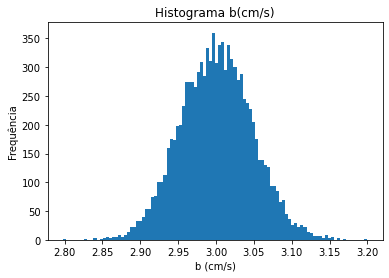

In [10]:
print(f'Desvio padrão de b = ({np.round(np.std(B[:,1], ddof=1), decimals=4)} +- {np.round(np.std(B[:,1], ddof=1)/(np.sqrt(2 * (N - 1))), decimals=4)}) cm/s')

plt.hist(B[:,1], bins=100)
plt.title('Histograma b(cm/s)')
plt.xlabel('b (cm/s)')
plt.ylabel('Frequência')
plt.savefig('TEFE25/b.png')
plt.show()

c.3) Faça um gráfico de dispersão entre os valores obtidos para 𝛼̃ e 𝛽̃ e calcule o correspondente coeficiente de correlação amostral, 𝜌̃𝛼,𝛽. Compare com o previsto no item a. Obs: Se necessário, estime a incerteza da correlação amostral por 𝑖𝑛𝑐𝑅 ≅ 1−𝑅 2√𝑁−1

 ρ = -0.843 +- 0.009


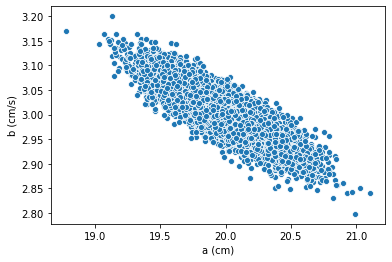

In [11]:
print(f' ρ = {np.round(np.corrcoef(B[:,0], B[:,1])[0,1], decimals=3)} +- {np.round((1 - np.corrcoef(B[:,0], B[:,1])[0,1]) / (2 * np.sqrt(N - 1)) , decimals=3)}')


sns.scatterplot(x=B[:,0], y=B[:,1])
plt.xlabel('a (cm)')
plt.ylabel('b (cm/s)')
plt.savefig('TEFE25/distribuicaodepontos.png')
plt.show()

c.4) Faça o histograma dos valores de 𝜒 2 obtidos nos 𝑁𝑅𝐸𝑃 ajustes. Calcule o valor médio dos 𝜒 2 (com sua respectiva incerteza) e compare com o número de graus de liberdade do ajuste.

X² = 9.07 +- 4.3


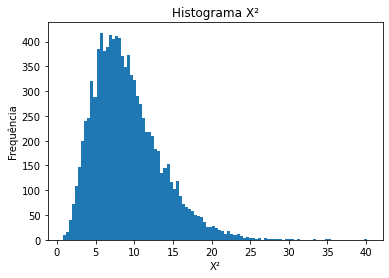

In [12]:
X2 = np.zeros(len(B))
for i in range(len(B)):
    X2[i] = np.sum( ( (y[i]-(B[i,1]*x + B[i,0]))/s)**2 )
    
print(f'X² = {np.round(np.mean(X2), decimals=2)} +- {np.round(np.std(X2, ddof=1), decimals=2)}')
plt.hist(X2, bins=100)
plt.title('Histograma X²')
plt.xlabel('X²')
plt.ylabel('Frequência')
plt.savefig('TEFE25/CHI2.png')
plt.show()